## GitHubのプログラム言語ランキングを行っているサイトからスレイピング
  やること  
  ・URLからHTMLを取得する  
  ・HTMLをパーズし必要なデータをPytonライブラリにあるDataFrameに代入する  
  ・DataFrameを使用しグラフを表示  

In [120]:
#IMPORT
import requests as req
from bs4 import BeautifulSoup
import pandas as pd


In [102]:
URL = "http://namaristats.com/datatable"
res = req.get(URL)
if res.status_code != 200:
    print("Failed Get Response URL %s" % (URL))

In [103]:
# 取得したレスポンスをBeautifulSoupを使用しパーズする
soup = BeautifulSoup(res.text, "lxml")

In [105]:
# 今回欲しいテーブルタグ内のHTMLを取得する
tabledata = soup.find_all("table", class_="tablesaw")

# テーブルヘッダーの情報を取得
th = tabledata[0].find_all("th", attrs={"scope" : "col"})

# テーブルヘッダーの情報を使いDataFrameにカラム名のみ設定する
df = pd.DataFrame(columns=[ column.get_text() for column in th ])


In [106]:
# 各プログラムのランキング値が欲しいのでTRタグの情報をtabledataから取得する
tr = tabledata[0].find_all("tr")

# プログラム名の名前を取得をCSSの方法で行う
langnames = [langname.get_text() for langname in tabledata[0].select("tr > th > a")]

# 各プログラムランキングデータはTableHeaderの次からあるのでそこから取得
for idx in range(1, len(tr)):
    data = [langnames[idx-1]]
    data.extend([ data.get_text() for data in tr[idx].find_all("td", class_="num") ])
    df = df.append(pd.Series(data, index=df.columns), ignore_index = True)

In [107]:
# DataFrameがどうなっているか表示（一部省略で表示される）
df

,Name,Total Repos,New Repos,% Increase rate,Update Repos,% Update Rate,Sleeping Repos,Star 1000+,Star 100+,Sum Top30 Stars,Fork 1000+,Fork 100+,Sum Top30 Forks,Total Users,Followers 100+,Repos per User
0,JavaScript,5469439,6997,0.13%,35071,0.64%,3105326,3786,25914,1666377,599,8183,375479,1689058,6812,3.24
1,Java,4721858,5891,0.12%,24171,0.51%,2820082,1722,11832,601045,397,5768,210042,1698964,2485,2.78
2,HTML,3151491,5352,0.17%,22672,0.72%,1474119,449,3227,457366,133,1749,257185,1026222,284,3.07
3,Python,2665664,3620,0.14%,18963,0.71%,1439492,1441,12845,789421,226,4319,224706,957231,3479,2.78
4,PHP,1673521,1762,0.11%,9297,0.56%,1045508,590,5514,352946,80,1895,127649,622341,1212,2.69
5,CSS,1492705,1854,0.12%,8616,0.58%,896489,356,2630,667824,66,1111,205242,455538,267,3.28
6,Ruby,1468379,979,0.07%,4148,0.28%,1132840,658,5536,483128,141,2382,141054,376756,1865,3.90
7,C#,1241415,1552,0.13%,7692,0.62%,705187,299,3069,223253,50,1186,78356,470477,601,2.64
8,C++,1213561,1310,0.11%,8278,0.68%,585995,591,5007,657011,110,1985,224744,493237,1006,2.46
9,C,924857,813,0.09%,5139,0.56%,595763,531,4866,425677,86,1708,135174,369973,953,2.50


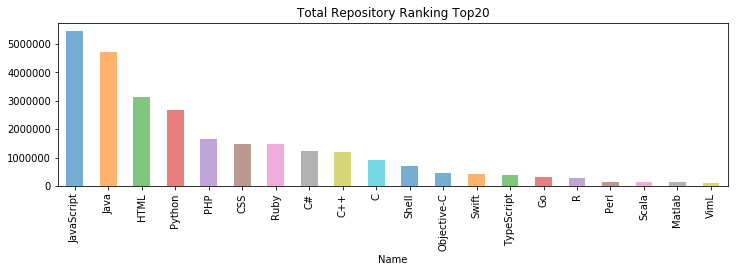

In [118]:
# DataFrameのINDEXを指定（グラフのX軸に表記するため）
plotcolmun = "Total Repos"
plotname = "Name"
dfplot = df.set_index([plotname])
dfplot[plotcolmun] = dfplot[plotcolmun].astype("int")
dfplot = dfplot.sort_values(plotcolmun, ascending=False).head(20)
dfplot["Total Repos"].plot(kind="bar", alpha=0.6, figsize=(12,3), title=u"Total Repository Ranking Top20")

終わり